In [53]:
# import all the libraries 
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Next we will mount our google drive on the colab 
run the code below and follow the instructions the G drive will be mounted on drive -> MyDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Readind the files as a pandas dataframe 

In [54]:
dataset=pd.read_csv("/content/input_file.txt",delimiter="\t", header=None)
dataset

,0
0,Text Analytics has lots of applications in tod...


converting the data frame to text

In [55]:
text= dataset[0][0]
text

"Text Analytics has lots of applications in today's online world. By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event. Amazon can understand user feedback or review on the specific product. BookMyShow can discover people's opinion about the movie. Youtube can also analyze and understand peoples viewpoints on a video."

Breaking the text into sentences 

In [56]:
tokenized_text = sent_tokenize(text)
print(tokenized_text)

["Text Analytics has lots of applications in today's online world.", 'By analyzing tweets on Twitter, we can find trending news and peoples reaction on a particular event.', 'Amazon can understand user feedback or review on the specific product.', "BookMyShow can discover people's opinion about the movie.", 'Youtube can also analyze and understand peoples viewpoints on a video.']


Breaking the text into words 

In [57]:
tokenized_word=word_tokenize(text)
print(tokenized_word)
print(len(tokenized_word))

['Text', 'Analytics', 'has', 'lots', 'of', 'applications', 'in', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'on', 'Twitter', ',', 'we', 'can', 'find', 'trending', 'news', 'and', 'peoples', 'reaction', 'on', 'a', 'particular', 'event', '.', 'Amazon', 'can', 'understand', 'user', 'feedback', 'or', 'review', 'on', 'the', 'specific', 'product', '.', 'BookMyShow', 'can', 'discover', 'people', "'s", 'opinion', 'about', 'the', 'movie', '.', 'Youtube', 'can', 'also', 'analyze', 'and', 'understand', 'peoples', 'viewpoints', 'on', 'a', 'video', '.']
65


finding the frequencies distribution

In [58]:
fdist = FreqDist(tokenized_word)
print(fdist)


<FreqDist with 49 samples and 65 outcomes>


Finding the two most common words  

In [59]:
fdist.most_common(2)

[('.', 5), ('on', 4)]

Plot of the frequencies distribution

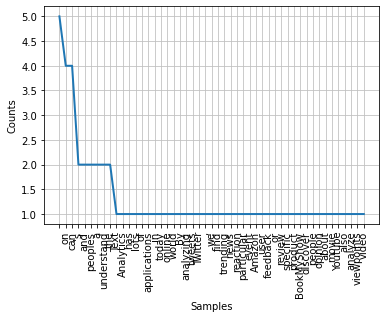

In [61]:
v=fdist.plot(65,cumulative=False)
plt.show()

### Analysis Tasks

Removing StopWords from the text

In [62]:
nltk.download('stopwords')
from nltk.corpus import stopwords
#load the stop words
stop_words=set(stopwords.words("english"))
print(stop_words)
#Removing the keywords that are stop words
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_word)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'when', 'me', 'do', 'with', 'i', 'out', 'himself', 'to', 'myself', 'below', 'from', "won't", 'can', 'above', 'yourself', 're', 'whom', "couldn't", 'further', 'wasn', 'any', "aren't", 'wouldn', 'were', 'if', 'have', 'our', 'after', 'his', 'an', 'now', 'didn', 'against', "hasn't", 'won', 'or', 'each', 'then', 'my', 'the', 'it', 'hers', 'yourselves', 'once', 'into', 'that', 'needn', 'while', 'their', "needn't", 'only', 'theirs', 'a', 'these', 'has', 'which', 'some', 'who', 'all', 'd', 'than', "she's", 'are', 's', 'ain', 'ma', 'herself', 'before', 'off', 'up', 'too', "haven't", 'few', "you've", "shan't", 'most', 'will', "doesn't", 'was', 'no', "you'll", 'because', 'over', 'ours', 'him', "mightn't", "mustn't", 'such', 'weren', 'yours', 'doesn', 'mustn', 'themselves', 'and', 'mightn', 'on', 'in', 'what', 'both', 'how', 'here', 'should', 'down', 'aren', 'don', 'by', 'we', "w

Creating a custom shaped wordcloud

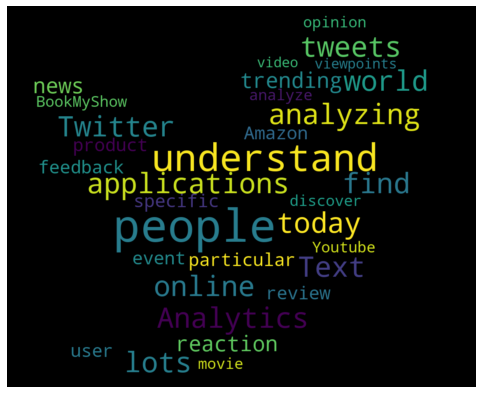

In [66]:
#Importing required library for WordCloud
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from wordcloud import WordCloud
#Making a mask for wordcloud
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, mask=Mask).generate(' '.join(filtered_word))
#Plot the wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Preforming Stemming on the filtered text

In [67]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
#loading porterStemmer
ps = PorterStemmer()
#Performing stemming and storing the stemmed word
stemmed_words=[]
for w in filtered_word:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_word)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Text', 'Analytics', 'lots', 'applications', 'today', "'s", 'online', 'world', '.', 'By', 'analyzing', 'tweets', 'Twitter', ',', 'find', 'trending', 'news', 'peoples', 'reaction', 'particular', 'event', '.', 'Amazon', 'understand', 'user', 'feedback', 'review', 'specific', 'product', '.', 'BookMyShow', 'discover', 'people', "'s", 'opinion', 'movie', '.', 'Youtube', 'also', 'analyze', 'understand', 'peoples', 'viewpoints', 'video', '.']
Stemmed Sentence: ['text', 'analyt', 'lot', 'applic', 'today', "'s", 'onlin', 'world', '.', 'By', 'analyz', 'tweet', 'twitter', ',', 'find', 'trend', 'news', 'peopl', 'reaction', 'particular', 'event', '.', 'amazon', 'understand', 'user', 'feedback', 'review', 'specif', 'product', '.', 'bookmyshow', 'discov', 'peopl', "'s", 'opinion', 'movi', '.', 'youtub', 'also', 'analyz', 'understand', 'peopl', 'viewpoint', 'video', '.']
